In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Book1.xlsx')

In [3]:
df.head()

,Price,Demand
0,32.0,100
1,23.0,200
2,21.0,500
3,18.0,800
4,17.0,900


<AxesSubplot:xlabel='Price', ylabel='Demand'>

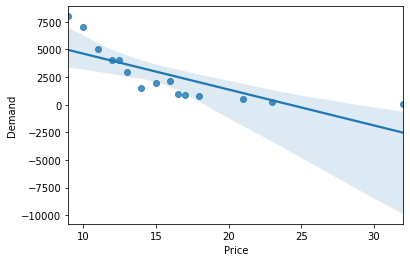

In [4]:
sns.regplot(x="Price", y="Demand", data=df,fit_reg=True) # fit_reg = False doest draw the linear line

## Refer to image in repository to check which transformation of data is to be applied 

## Now we will find out the correlation and then R-sq. for price and demand

In [5]:
correlation = df['Price'].corr(df['Demand'])
correlation

-0.7776754206969088

In [6]:
R_sq = correlation**2
R_sq


#this means we have 98% variance  ~ Variance is a measure of how data points differ from the mean.

0.604779059956114

### Now do the data Transformation 

In [7]:
df['LogPrice']= np.log(df['Price'])
df['LogDemand']= np.log(df['Demand'])
df.head()

,Price,Demand,LogPrice,LogDemand
0,32.0,100,3.465736,4.605170
1,23.0,200,3.135494,5.298317
2,21.0,500,3.044522,6.214608
3,18.0,800,2.890372,6.684612
4,17.0,900,2.833213,6.802395


### We have to apply linear regression to calculate elasticity 

We have 2 ways to do that 

Lets check one by one

# Method 1) SKLEARN -Linear Regression

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , r2_score

In [9]:
lm = linear_model.LinearRegression()

In [10]:
lm.fit(np.array(df['LogDemand']).reshape(-1,1)   ,   np.array(df['LogPrice']).reshape(-1,1))

LinearRegression()

In [11]:
lm.coef_ # price will increase then demand will decrease

array([[-0.25758712]])

# ELASTICITY : -0.25
    
lm.coef_
array([[-0.25758712]])    

In [12]:
lm.intercept_ # The mean of the response, Y

array([4.60718585])

In [13]:
# creating a dataframe
df2 = pd.DataFrame()
df2['Price']= df['Price'].values.copy()
df2['Demand']= df['Demand'].values.copy()
df2['LogDemand']= df['LogDemand'].values.copy()
df2['LogPrice']= df['LogPrice'].values.copy()
df2.head()

,Price,Demand,LogDemand,LogPrice
0,32.0,100,4.605170,3.465736
1,23.0,200,5.298317,3.135494
2,21.0,500,6.214608,3.044522
3,18.0,800,6.684612,2.890372
4,17.0,900,6.802395,2.833213


In [14]:
df2['PredSKlearn']=lm.predict(np.array(df2['LogPrice']).reshape(-1, 1))

In [15]:
df2.head()

,Price,Demand,LogDemand,LogPrice,PredSKlearn
0,32.0,100,4.605170,3.465736,3.714457
1,23.0,200,5.298317,3.135494,3.799523
2,21.0,500,6.214608,3.044522,3.822956
3,18.0,800,6.684612,2.890372,3.862663
4,17.0,900,6.802395,2.833213,3.877387


In [16]:
# calculate rmse
print('RMSE :%.4f '% np.sqrt(mean_squared_error(np.array(df2['LogDemand']).reshape(-1,1)  ,  np.array(df2['PredSKlearn']).reshape(-1,1))))

RMSE :3.6150 


In [17]:
# calculate r**2
print('R**2 :  %.4f'% r2_score(np.array(df2['LogDemand']).reshape(-1,1)  ,  np.array(df2['PredSKlearn']).reshape(-1,1)))

R**2 :  -7.6586
